                                           File name  Temperature (K)  \
1  OneView_200kV_10kX_FGT_A1_0011_018K_2.42by3.74...               18   
4  OneView_200kV_10kX_FGT_A1_0020_039K_2.42by3.74...               39   
6  OneView_200kV_10kX_FGT_A1_0030_061K_2.42by3.74...               61   
3  OneView_200kV_10kX_FGT_A1_0031_080K_2.42by3.74...               80   
7  OneView_200kV_10kX_FGT_A1_0035_103K_2.42by3.74...              103   
8  OneView_200kV_10kX_FGT_A1_0037_121K_2.42by3.74...              121   
5  OneView_200kV_10kX_FGT_A1_0039_128K_2.42by3.74...              128   
0  OneView_200kV_10kX_FGT_A1_0041_137K_2.42by3.74...              137   
2  OneView_200kV_10kX_FGT_A1_0045_153K_2.42by3.74...              153   

   Light pixel to total pixel ratio  \
1                             0.440   
4                             0.442   
6                             0.460   
3                             0.460   
7                             0.465   
8                             0.447

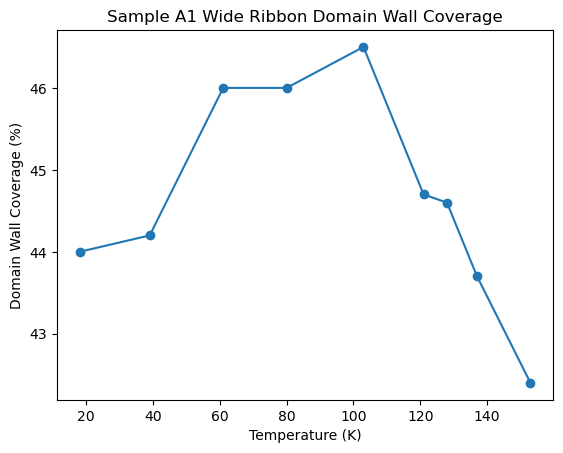

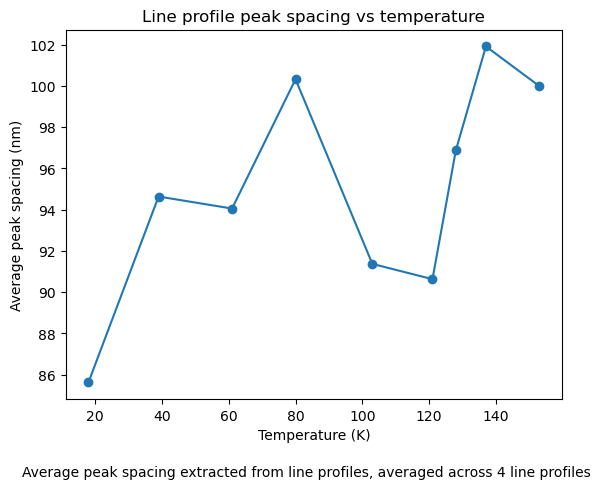

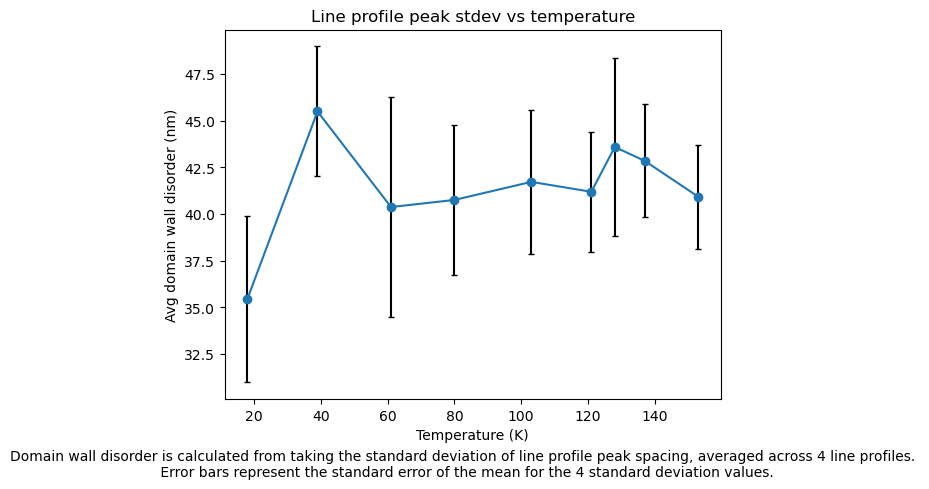

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import os

#load/ file
current_path = os.getcwd()
folder_name= '6000OLF_WideRibbon_2mmDefocus_20DegTilt_Rotated15Deg'
DATA_PATH = os.path.join(current_path, 'images', folder_name,'processed') #path to where the data is saved
file_path = os.path.join(DATA_PATH, 'data_summary.csv')

df=pd.read_csv(file_path)

df_sorted = df.sort_values(by='Temperature (K)')
print(df_sorted)

def light_pixel_ratio_graph(dataframe):
    plt.plot(df_sorted['Temperature (K)'],df_sorted['Light pixel to total pixel ratio']*100,marker = 'o') 
    plt.xlabel("Temperature (K)")
    plt.ylabel("Domain Wall Coverage (%)")
    plt.title('Sample A1 Wide Ribbon Domain Wall Coverage')
    output_filename = os.path.join(DATA_PATH, '_domain_wall_coverage.png')
    plt.savefig(output_filename)
    plt.show()
    
def line_profile_spacing(dataframe): 
    plt.plot(df_sorted['Temperature (K)'], df_sorted['Avg peak spacing (nm)'],marker = 'o')
    plt.xlabel("Temperature (K)")
    plt.ylabel("Average peak spacing (nm)")
    plt.title("Line profile peak spacing vs temperature")
    fig = plt.gcf() 
    fig.text(0.5, -0.05, 'Average peak spacing extracted from line profiles, averaged across 4 line profiles', ha='center', fontsize=10)
    output_filename = os.path.join(DATA_PATH, 'Avg_spacing.png')
    plt.savefig(output_filename)
    plt.show()
    
def line_profile_stdev(dataframe): 
    plt.errorbar(df_sorted['Temperature (K)'], df_sorted['Standard Deviation of Peak Spacing averaged over 4 line profiles(nm)'],
                 yerr= df_sorted['error on std avg(nm)'],ecolor = 'black', capsize=2, marker = 'o')
    plt.xlabel("Temperature (K)")
    plt.ylabel("Avg domain wall disorder (nm)")
    plt.title("Line profile peak stdev vs temperature")
    fig = plt.gcf() 
    fig.text(0.5, -0.05, 'Domain wall disorder is calculated from taking the standard deviation of line profile peak spacing, averaged across 4 line profiles. \n Error bars represent the standard error of the mean for the 4 standard deviation values.', ha='center', fontsize=10)
    output_filename = os.path.join(DATA_PATH, '_avg_disorder.png')
    plt.savefig(output_filename)
    plt.show()

light_pixel_ratio_graph(df_sorted)
line_profile_spacing(df_sorted)
line_profile_stdev(df_sorted)